<a href="https://colab.research.google.com/github/bichu136/CS114.L11.KHCL/blob/master/Linear_Rgression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tổng hợp kiến thức về Linear Regression
### Bài toán:
Input: Các đặc trưng X
Output: Y cần dự đoán

#Linear Regression model:
Tìm đường thẳng biểu diễn mối liên hệ giữa các X và Y \\
Đường thẳng có dạng: y = a0 + a1.X1 + a2.x2 + ... + an.xn \\
Với bài toán chỉ có 1 đặc trưng X, đường thẳng sẽ có dạng: y = ax + b

# Cost Function
Hàm tính toán chi phí để giúp tìm ra cặp giá trị a, b phù hợp \\
VD: Residual sum of squares (RSS)

# Gradient Descent
Là phương pháp cập nhật a, b để giảm cost function

# VD
Dự đoán giá nhà
1. Input: Diện tích nhà
1. Output: Giá nhà dự đoán
1. Data: Giá của các nhà hàng xóm trong 2 năm gần đây


# Bài tập về Linear Regression

## Single variable

In [4]:
!wget http://cs.uit.edu.vn/data.txt

--2020-11-15 17:40:43--  http://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt.4’

data.txt.4          100%[===================>]  82.43K   260KB/s    in 0.3s    

2020-11-15 17:40:44 (260 KB/s) - ‘data.txt.4’ saved [84410/84410]



In [9]:
!wget http://cs.uit.edu.vn/data3.txt

--2020-11-15 17:41:22--  http://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt’

data3.txt           100%[===================>] 174.70K   368KB/s    in 0.5s    

2020-11-15 17:41:23 (368 KB/s) - ‘data3.txt’ saved [178891/178891]



In [ ]:
! cat data.txt

In [ ]:
! cat data3.txt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# file data.txt
data = pd.read_csv('data.txt', header=None)
X  = data[0]
Y  = data[1]

# Split the data into training/testing sets
X_train = np.array(X[:-1000])
X_test = np.array(X[-1000:])

# Split the targets into training/testing sets
Y_train = np.array(Y[:-1000])
Y_test = np.array(Y[-1000:])

print(X.shape)
print(X_train.shape)

(5211,)
(4211,)


In [10]:
# file data3.txt
data = pd.read_csv('data3.txt', header=None)
X3  = data[0]
Y3  = data[1]

# Split the data into training/testing sets
X3_train = np.array(X[:-1000])
X3_test = np.array(X[-1000:])

# Split the targets into training/testing sets
Y3_train = np.array(Y[:-1000])
Y3_test = np.array(Y[-1000:])

print(X3.shape)
print(X3_test.shape)

(10590,)
(1000,)


In [11]:
def one_feature(X):
  return X.reshape(-1, 1)

def multi_feature(X, Fe):
  X = X.reshape(-1,1)
  return np.hstack((X, (np.array(Fe)).reshape(-1, 1) ))

def test_feature_engineering(X):
  X = X.reshape(-1,1)
  return np.hstack((X, np.ones((X.shape[0], 1)) ))

def feature_engineering(X, new_X):
  X = X.reshape(-1, 1)
  new_X = new_X.reshape(-1, 1)
  return np.hstack((X, new_X))

In [ ]:
X_trial = X_test.reshape(-1, 1)
print(X_trial[:20])
X_trial = test_feature_engineering(X_trial)
print(X_trial[:20])

In [ ]:
print(test_feature_engineering(Y_train))

[[1.20058   1.       ]
 [0.509774  1.       ]
 [1.47608   1.       ]
 ...
 [2.31565   1.       ]
 [0.0343877 1.       ]
 [2.71448   1.       ]]


In [ ]:
# # Single-feature Linear Regression
X_train = one_feature(X_train)
Y_train = one_feature(Y_train)
X_test = one_feature(X_test)
Y_test = one_feature(Y_test)

In [ ]:
# # Multi-feature Linear Regression
# h = a*x -> h = a*x1 + b*x0 with x0 = 1
X_train = test_feature_engineering(X_train)
Y_train = test_feature_engineering(Y_train)

# h = a*x -> h = a*x1 + b*x0 with x0 = 1
X_test = test_feature_engineering(X_test)
Y_test = test_feature_engineering(Y_test)

Coefficients: 
 [[2.84130124e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Mean squared error: 0.000532
Coefficient of determination: 0.999196


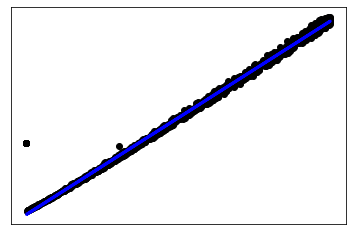

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.6f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.6f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [12]:
# # Create multi-feature dataset processing
log2_X = [np.log2(val) for val in X_train[:]]
log2_X = np.array(log2_X)
X_train = feature_engineering(X_train, log2_X)

log2_X = [np.log2(val) for val in X_test[:]]
log2_X = np.array(log2_X)
X_test = feature_engineering(X_test, log2_X)

print(X_train.shape)

(4211, 2)


Coefficients: 
 [ 2.91772880e-07 -1.75271575e-02]
Mean squared error: 0.000875
Coefficient of determination: 0.998678


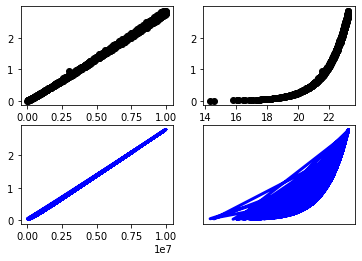

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.6f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.6f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].scatter(X_test[:, 0], Y_test,  color='black')
ax[1, 0].plot(X_test[:, 0], Y_pred, color='blue', linewidth=3)

ax[0, 1].scatter(X_test[:, 1], Y_test,  color='black')
ax[1, 1].plot(X_test[:, 1], Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()